Run this in a terminal to make sure the shared folder is mounted (only at the beginning when booting up the VM.)

    sudo mount -t vboxsf -o uid=$UID,gid=$(id -g) simulation_results ~/Documents/sf_simulation_results/

Then compile the Cartilage Sheet Simulation app using make.


In [1]:
%%bash
cd ../chaste_build/
make CartilageSheetSimulation

[  5%] Built target timekeeper
[ 15%] Built target chaste_global
[ 15%] Built target chaste_linalg
[ 21%] Built target chaste_io
[ 26%] Built target chaste_ode
[ 42%] Built target chaste_mesh
[ 47%] Built target chaste_pde
[ 94%] Built target chaste_cell_based
Scanning dependencies of target chaste_project_cartilage
[ 94%] Building CXX object projects/cartilage/CMakeFiles/chaste_project_cartilage.dir/src/NodeBasedCartilageSheet.cpp.o
[ 94%] Building CXX object projects/cartilage/CMakeFiles/chaste_project_cartilage.dir/src/population/force/PWQGeneralisedLinearSpringForce.cpp.o
[ 94%] Building CXX object projects/cartilage/CMakeFiles/chaste_project_cartilage.dir/src/population/force/RepulsionCubicForce.cpp.o
[ 94%] Linking CXX shared library libchaste_project_cartilage.so
[100%] Built target chaste_project_cartilage
Scanning dependencies of target CartilageSheetSimulation
[100%] Building CXX object projects/cartilage/apps/CMakeFiles/CartilageSheetSimulation.dir/src/CartilageSheetSimulati

In [2]:
import sys
sys.path.append('analysis')

import numpy as np
import time 
import matplotlib.pyplot as plt
import distribute_executable as de
import sheet_metrics as sm

plt.style.use('seaborn-whitegrid')
#plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6.75, 5),
          'lines.linewidth': 3.0,
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'font.size': 12}
plt.rcParams.update(params)

In [7]:
output_directory = 'exp-cubic_force/effect_repulsion/' + time.strftime("%Y%m%d-%H%M%S") +'/'
flags = ' --sbt' # synchronized birth times
flags = flags + ' --T 45.0' # final time 45h
flags = flags + ' --sw 10' # 10 cells in x direction
flags = flags + ' --sd 20' # 20 cells in y direction
flags = flags + ' --sh 1' # 1 cell in z direction
flags = flags + ' --mu 8.0' # For the cubic repulsion only force we set this mu 
flags = flags + ' --A 0.5' # 50% of stem cells activated
flags = flags + ' --F cubic_repulsion_only' # cubic repulsion only force
#flags = flags + ' --mu_R 8.0' # set repulsive spring stiffness to 8.0
flags = flags + ' --p 0.1' # set perturbation to 0.1



In [8]:
de.run_simulations_multiple_random_seeds(output_directory, flags=flags, number_of_simulations=10)

nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-cubic_force/effect_repulsion/20200304-105749/ --S 0 --sbt --T 45.0 --sw 10 --sd 20 --sh 1 --mu 8.0 --A 0.5 --F cubic_repulsion_only --p 0.1
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-cubic_force/effect_repulsion/20200304-105749/ --S 1 --sbt --T 45.0 --sw 10 --sd 20 --sh 1 --mu 8.0 --A 0.5 --F cubic_repulsion_only --p 0.1
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-cubic_force/effect_repulsion/20200304-105749/ --S 2 --sbt --T 45.0 --sw 10 --sd 20 --sh 1 --mu 8.0 --A 0.5 --F cubic_repulsion_only --p 0.1
nice -n 19 /home/kubuntu1804/Documents/chaste_build/projects/cartilage/apps/CartilageSheetSimulation --output-dir exp-cubic_force/effect_repulsion/20200304-105749/ --S 3 --sbt --T 45.0 --sw 10 --sd 20 --sh 1 --mu 8.0 --A 0.5 -

In [9]:
de.run_postprocessing_multiple_random_seeds(10, output_directory)

['/home/kubuntu1804/Documents/sf_simulation_results/exp-cubic_force/effect_repulsion/20200304-105749/0/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-cubic_force/effect_repulsion/20200304-105749/1/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-cubic_force/effect_repulsion/20200304-105749/2/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-cubic_force/effect_repulsion/20200304-105749/3/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-cubic_force/effect_repulsion/20200304-105749/4/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-cubic_force/effect_repulsion/20200304-105749/5/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-cubic_force/effect_repulsion/20200304-105749/6/results_from_time_0/', '/home/kubuntu1804/Documents/sf_simulation_results/exp-cubic_force/effect_repulsion/20200304-105749/7/results_from_time_0/',

analysis/sheet_metrics.py:92: RuntimeWarning: All-NaN slice encountered
  width[:, 0] = abs(np.nanmax(coordinates[:,0::3], axis=1)- np.nanmin(coordinates[:,0::3], axis=1))
analysis/sheet_metrics.py:92: RuntimeWarning: All-NaN axis encountered
  width[:, 0] = abs(np.nanmax(coordinates[:,0::3], axis=1)- np.nanmin(coordinates[:,0::3], axis=1))
analysis/sheet_metrics.py:93: RuntimeWarning: All-NaN slice encountered
  width[:, 1] = abs(np.nanmax(coordinates[:,1::3], axis=1)- np.nanmin(coordinates[:,1::3], axis=1))
analysis/sheet_metrics.py:93: RuntimeWarning: All-NaN axis encountered
  width[:, 1] = abs(np.nanmax(coordinates[:,1::3], axis=1)- np.nanmin(coordinates[:,1::3], axis=1))
analysis/sheet_metrics.py:94: RuntimeWarning: All-NaN slice encountered
  width[:, 2] = abs(np.nanmax(coordinates[:,2::3], axis=1)- np.nanmin(coordinates[:,2::3], axis=1))
analysis/sheet_metrics.py:94: RuntimeWarning: All-NaN axis encountered
  width[:, 2] = abs(np.nanmax(coordinates[:,2::3], axis=1)- np.nanmin(c

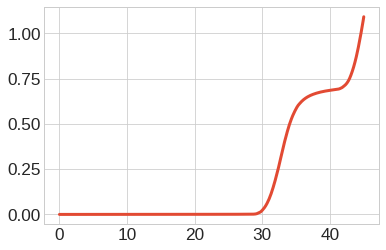

In [10]:
# time steps are consistent across runs, so it's sufficient to load them from a single path
times, coords = sm.read_in_data('/home/kubuntu1804/Documents/sf_simulation_results/'+output_directory + '0/results_from_time_0/') 

ppa_av = np.zeros(times.shape)
for seed in range(10):
    ppa_av = ppa_av + np.loadtxt('/home/kubuntu1804/Documents/sf_simulation_results/'+output_directory+str(seed)+'/results_from_time_0/metrics_results/data_patch_projection_area_av.txt', dtype=float)
ppa_av = ppa_av /10

plt.plot(times, ppa_av)

